# Introduction to Data Science in Python

In [ ]:
print('Hello, world!')

## Example: Tables

In [16]:
import numpy as np
import pandas as pd
dates = pd.date_range("20201201", periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['Patient A', 'Patient B', 'Patient C', 'Patient D'])
#df

In [ ]:
df.head(3)
df.tail(2)
df.index
df.columns

In [ ]:
df.describe()

In [ ]:
df['Patient B']
df['20201201':'20201203']
df.loc[dates[0]]
df.loc[dates[0], 'Patient C']

In [ ]:
df2 = df[df > 0]
df2

In [ ]:
pd.isna(df2)

In [ ]:
df2.dropna(how="any")

In [ ]:
df2.fillna(value=0)

## Example: Visualising the Iris Dataset

In [24]:
from sklearn.datasets import load_iris
data_iris = load_iris()
print(data_iris)
#len(data_iris.target)
#print(data_iris.target_names)
#print(data_iris.feature_names)

In [21]:
import plotly.express as px
df = px.data.iris()
#px.scatter(df, x="sepal_width", y="sepal_length")

## Example: Clustering

In [22]:
x = data_iris.data
y = data_iris.target

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(x_train, y_train)
knn_classifier.score(x_test, y_test)

In [1]:
knn_classifier.predict(x_test)

## Example: Linear Regression

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


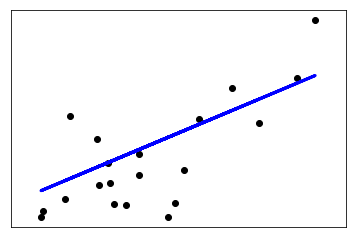

In [22]:
# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
#otherwise not visible

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Images & A counterexample (cell segmentation with 'traditional' methods)

In [2]:
import sys
!{sys.executable} -m pip install --user -i http://pypi.repo.test.hhu.de/simple/ --trusted-host pypi.repo.test.hhu.de -U scikit-image

Looking in indexes: http://pypi.repo.test.hhu.de/simple/
Requirement already up-to-date: scikit-image in ./.local/lib/python3.6/site-packages (0.17.2)
You should consider upgrading via the '/software/python/3.6.5/ivybridge/bin/python3.6 -m pip install --upgrade pip' command.


In [11]:
import sys
!{sys.executable} -m pip install --user -i http://pypi.repo.test.hhu.de/simple/ --trusted-host pypi.repo.test.hhu.de pooch

Looking in indexes: http://pypi.repo.test.hhu.de/simple/
     |████████████████████████████████| 51 kB 28.8 MB/s eta 0:00:01
You should consider upgrading via the '/software/python/3.6.5/ivybridge/bin/python3.6 -m pip install --upgrade pip' command.


In [3]:
from skimage.data import download_all
download_all()

ConnectionError: HTTPSConnectionPool(host='github.com', port=443): Max retries exceeded with url: /scikit-image/scikit-image/raw/v0.17.x/skimage/color/tests/data/lab_array_a_2.npy (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x2b136fa42dd8>: Failed to establish a new connection: [Errno 110] Connection timed out',))

https://scikit-image.org/docs/dev/auto_examples/applications/plot_human_mitosis.html

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

from skimage import (
    color, feature, filters, measure, morphology, segmentation, util
)
from skimage.data import human_mitosis

image = human_mitosis()

fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')
ax.set_title('Microscopy image of human cells stained for nuclear DNA')
plt.show()

ImportError: cannot import name 'human_mitosis'

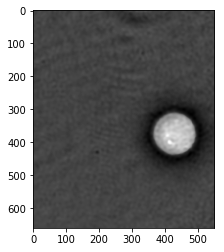

In [7]:
from skimage.data import cell
image = cell()
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')
plt.show()

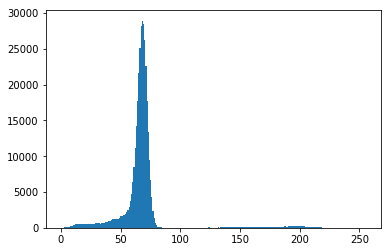

In [11]:
import matplotlib.pyplot as plt
ax = plt.hist(image.ravel(), bins = 256)
plt.show()

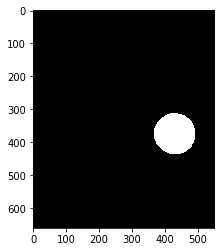

In [14]:
fig, ax = plt.subplots()
ax.imshow(image>100, cmap='gray')
plt.show()

## Deep Learning
Use **TensorFlow** and **Keras** to build your first neural network that is able to classify images of handwritten digits (MNIST database, see http://yann.lecun.com/exdb/mnist/)<br>
In order to use those Python modules, we need to install them locally as follows:

In [1]:
import sys
!{sys.executable} -m pip install --user -i http://pypi.repo.test.hhu.de/simple/ --trusted-host pypi.repo.test.hhu.de tensorflow

Looking in indexes: http://pypi.repo.test.hhu.de/simple/
     |████████████████████████████████| 454.3 MB 10.8 MB/s eta 0:00:01    |▉                               | 11.5 MB 59.3 MB/s eta 0:00:08     |█                               | 15.4 MB 59.3 MB/s eta 0:00:08     |█▍                              | 19.4 MB 59.3 MB/s eta 0:00:08     |██▊                             | 38.8 MB 59.3 MB/s eta 0:00:08     |███▉                            | 54.2 MB 59.3 MB/s eta 0:00:07     |█████▍                          | 77.3 MB 75.1 MB/s eta 0:00:06     |██████▌                         | 92.2 MB 75.1 MB/s eta 0:00:05     |█████████▎                      | 132.4 MB 75.1 MB/s eta 0:00:05     |█████████████▋                  | 192.6 MB 76.4 MB/s eta 0:00:04     |██████████████▎                 | 203.0 MB 84.7 MB/s eta 0:00:03     |██████████████████▉             | 267.4 MB 12.2 MB/s eta 0:00:16     |████████████████████▊           | 294.1 MB 12.2 MB/s eta 0:00:14     |█████████████████████▍          | 3

The code only consists of 8 commands. (https://www.tensorflow.org/overview/)

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data() #this is apparently too slow for Jupyter Hub
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

This will however not work here in Jupyter Hub. We have to load the mnist data differently...

In [2]:
#solution: download data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
#          and save in your directory
import numpy as np
with np.load('mnist.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

Now we can run the deep learning code above...

In [3]:
import tensorflow as tf

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
x_train_small = x_train[:10000]
y_train_small = y_train[:10000]

In [18]:
model.fit(x_train_small, y_train_small, epochs=5)

In [17]:
model.evaluate(x_test, y_test)

[Group Work] It's your turn! You should now be able to go through the Fashion MNIST example at https://www.tensorflow.org/tutorials/keras/classification and follow each step. The procedure is very similar to the MNIST example above. Good luck, you can do it!